# Phishing URL Detection

El dataset elegido es Phishing URL Detection de la web Kaggle.com.
https://www.kaggle.com/datasets/sergioagudelo/phishing-url-detection?resource=download

Este dataset sobre detección de phishing es una colección extensa de URLs, en los que se encuentra la variable target elegida, la cual figura como "legítima" o de "phishing".
Esta permitiría facilitar la investigación y desarrollo de algoritmos de clasificación para identificar sitios web fraudulentos. Esta base de datos, con aproximadamente 2.5 millones de muestras, abarca URLs etiquetadas como phishing o legítimas, obtenidas de repositorios principales de URLs de phishing (como PhishTank y Phishing.Database) y sitios de clasificación de URLs (como Cisco Umbrella Popularity List y The Majestic Million). La finalidad del creador de este dataset es abordar la falta de grandes conjuntos de datos etiquetados y/o herramientas de sandboxing que permitan una importación sencilla de muestras de URL para la detección de phishing.

El dataset incluye 15 características relevantes para la detección de phishing, que se describen a continuación:

**url**: La cadena de caracteres que representa la URL.

**source**: La fuente de la URL, ya sea de URLs de phishing o de bases de datos de clasificación de URLs.

**label**: La categoría de la URL, que puede ser phishing o legítima.

**url_length**: La longitud de la URL en caracteres.

**starts_with_ip**: Indica si la URL base es una dirección IP.

**url_entropy**: La entropía de la URL o el nombre de host, una medida de la aleatoriedad en la URL.

**has_punycode**: Indica si la URL contiene al menos un carácter punycode, utilizado para representar caracteres no ASCII.

**digit_letter_ratio**: La relación entre dígitos y letras en la URL.

**dot_count**: El número de ocurrencias del punto (.) dentro de la URL.

**at_count**: El número de ocurrencias del símbolo (@) dentro de la URL.

**dash_count**: El número de ocurrencias del guion (-) dentro de la URL.

**tld_count**: El número de dominios de nivel superior en el subdirectorio de la URL.

**domain_has_digits**: Indica si el dominio base de la URL contiene dígitos.

**subdomain_count**: El número de subdominios presentes en la URL base.

**nan_char_entropy**: La entropía de los caracteres no alfanuméricos dentro de la URL.

**has_internal_links**: Indica si el subdirectorio de la URL contiene enlaces internos.

**whois_data**: Datos del registro WHOIS del dominio.

**domain_age_days**: La edad del dominio en días, según el registro WHOIS extraído.

Este dataset podría proporcionar una base de datos para construir modelos de clasificación de phishing, permitiendo a los investigadores y desarrolladores evaluar y mejorar la precisión de sus sistemas de detección mediante el análisis de diversas características de las URLs.


## 1. Carga y visualización del dataset

Dado que el dataset original cuenta con mas de 2.5 millones de registros y pesa 2gb aproximadamente, decidí recortarlo considerablemente para poder trabajar con él a un total de 125000 filas (99 mb), ya que sino era imposible subirlo a github.
A continuación se encuentra el código que se utilizó para recortarlo.

In [ ]:
import pandas as pd

# Se agregó la posiblidad de leer el archivo con diferentes codificaciones, dado que el mismo fallaba en la lectura por algunos caracteres.
try:
    df = pd.read_csv('out.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        df = pd.read_csv('out.csv', encoding='windows-1252')
    except UnicodeDecodeError:
        df = pd.read_csv('out.csv', encoding='ISO-8859-1')

# Mezclmos las filas aleatoriamente
df_shuffled = df.sample(frac=1).reset_index(drop=True)

# Seleccionamos las primeras 125,000 filas
df_reducido = df_shuffled.head(125000)

# Guardamos el nuevo archivo CSV con codificación UTF-8
df_reducido.to_csv('out2.csv', index=False, encoding='utf-8')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
url = 'https://github.com/marianc90/DataScienceCH/raw/refs/heads/main/Entregas/dataset/cutted.csv'  # Cambia esto por la ruta a tu archivo CSV
df = pd.read_csv(url)

In [4]:
df.head()

,url,source,label,url_length,starts_with_ip,url_entropy,has_punycode,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,domain_has_digits,subdomain_count,nan_char_entropy,has_internal_links,whois_data,domain_age_days
0,media-library.stackla.com,Cisco-Umbrella,legitimate,25,False,3.843856,False,0.000000,2,0,1,0,False,1,0.291508,False,"{'domain_name': ['STACKLA.COM', 'stackla.com']...",4549.0
1,https://awalktoremember5k.org/aitziber-9alarra...,Phishing.Database,phishing,86,False,4.484697,False,0.140625,1,0,8,0,True,0,0.318331,False,NaN,NaN
2,rr2---sn-5ualdnsd.googlevideo.com,Cisco-Umbrella,legitimate,33,False,3.991216,False,0.080000,2,0,4,0,False,1,0.245115,False,"{'domain_name': ['GOOGLEVIDEO.COM', 'googlevid...",7777.0
3,riccialexis.com,Majestic,legitimate,15,False,3.272906,False,0.000000,1,0,0,0,False,0,0.260459,False,"{'domain_name': 'RICCIALEXIS.COM', 'registrar'...",4323.0
4,damanhealth.ae,Majestic,legitimate,14,False,2.950212,False,0.000000,1,0,0,0,False,0,0.271954,False,"{'domain_name': 'damanhealth.ae', 'status': 'o...",NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   url                 125000 non-null  object 
 1   source              125000 non-null  object 
 2   label               125000 non-null  object 
 3   url_length          125000 non-null  int64  
 4   starts_with_ip      125000 non-null  bool   
 5   url_entropy         125000 non-null  float64
 6   has_punycode        125000 non-null  bool   
 7   digit_letter_ratio  125000 non-null  float64
 8   dot_count           125000 non-null  int64  
 9   at_count            125000 non-null  int64  
 10  dash_count          125000 non-null  int64  
 11  tld_count           125000 non-null  int64  
 12  domain_has_digits   125000 non-null  bool   
 13  subdomain_count     125000 non-null  int64  
 14  nan_char_entropy    125000 non-null  float64
 15  has_internal_links  125000 non-nul

In [6]:
df.describe(include='all')

,url,source,label,url_length,starts_with_ip,url_entropy,has_punycode,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,domain_has_digits,subdomain_count,nan_char_entropy,has_internal_links,whois_data,domain_age_days
count,125000,125000,125000,125000.000000,125000,125000.000000,125000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000,125000.000000,125000.000000,125000,97712,87446.000000
unique,125000,5,2,NaN,2,NaN,2,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,2,56699,NaN
top,media-library.stackla.com,Phishing.Database,phishing,NaN,False,NaN,False,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,"{'domain_name': None, 'registrar': None, 'whoi...",NaN
freq,1,58417,62505,NaN,123720,NaN,124890,NaN,NaN,NaN,NaN,NaN,111374,NaN,NaN,122078,4521,NaN
mean,NaN,NaN,NaN,45.903360,NaN,3.908089,NaN,0.116016,2.169704,0.011416,0.745296,0.038424,NaN,0.777448,0.465127,NaN,NaN,4850.949340
std,NaN,NaN,NaN,70.387151,NaN,0.637633,NaN,0.239852,1.681261,0.132687,1.728749,0.433153,NaN,1.098002,0.188249,NaN,NaN,3341.820108
min,NaN,NaN,NaN,4.000000,NaN,1.251629,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.061402,NaN,NaN,0.000000
25%,NaN,NaN,NaN,17.000000,NaN,3.447402,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.306397,NaN,NaN,1988.000000
50%,NaN,NaN,NaN,29.000000,NaN,3.909368,NaN,0.000000,2.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.415452,NaN,NaN,4281.000000
75%,NaN,NaN,NaN,52.000000,NaN,4.331977,NaN,0.133333,3.000000,0.000000,1.000000,0.000000,NaN,1.000000,0.618469,NaN,NaN,7711.000000


## 2.Análisis Exploratorio de Datos (EDA)

### 1. Análisis Descriptivo:

**Distribución de Etiquetas**: Como vemos la proporción de URLs etiquetadas como phishing frente a las etiquetadas como legítimas casi 50-50, esto ayuda a entender el balance del dataset.


In [7]:
df['label'].value_counts()

label
phishing      62505
legitimate    62495
Name: count, dtype: int64

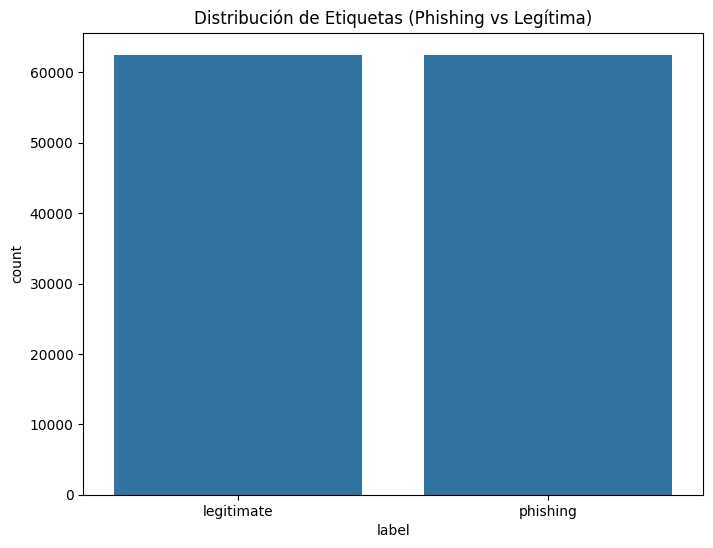

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Distribución de Etiquetas (Phishing vs Legítima)')
plt.show()

**Distribución de Longitudes de URL**: Analizamos la longitud de las URLs ya que podría proporcionar información sobre si las URLs de phishing tienden a ser más largas o más cortas que las legítimas.  Como hay una gran variabilidad en los datos, aplicamos una transformación logarítmica para visualizar mejor los valores bajos en contraposición con los altos. El hue nos permite distinguir entre las diferentes categorías legitimo o phishing en el gráfico.

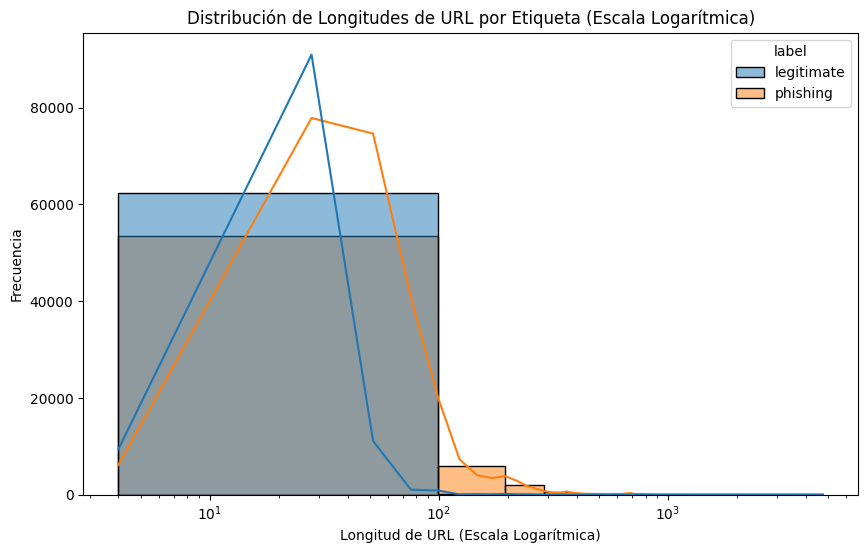

In [9]:
# Distribución de la longitud de las URLs con transformación logarítmica y hue de etiqueta
plt.figure(figsize=(10, 6))
sns.histplot(df, x='url_length', hue='label', kde=True, bins=50, palette='tab10')
plt.xscale('log')
plt.title('Distribución de Longitudes de URL por Etiqueta (Escala Logarítmica)')
plt.xlabel('Longitud de URL (Escala Logarítmica)')
plt.ylabel('Frecuencia')
plt.show()

### 2. Análisis de Características:

**Frecuencia de Características Booleanas**: Evaluamos la frecuencia de características como starts_with_ip, has_punycode, y domain_has_digits para identificar si hay diferencias significativas entre URLs de phishing y legítimas.

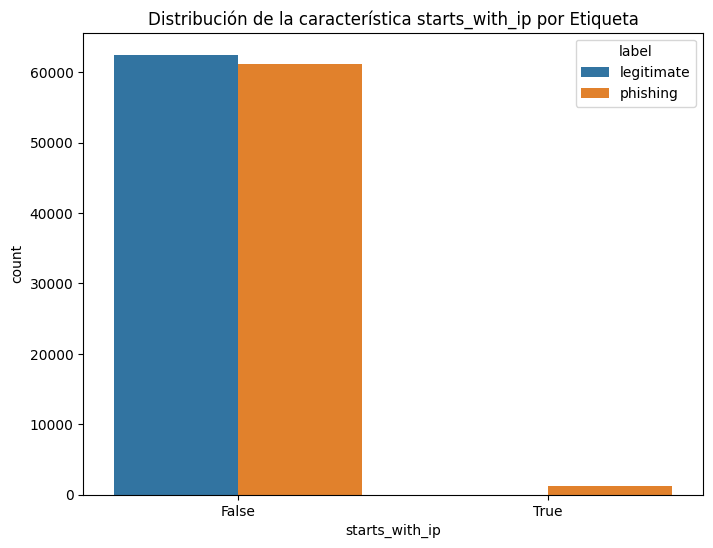

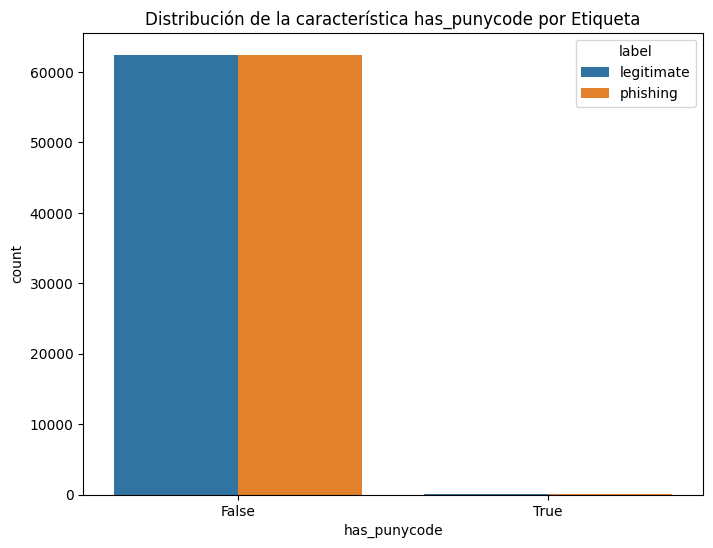

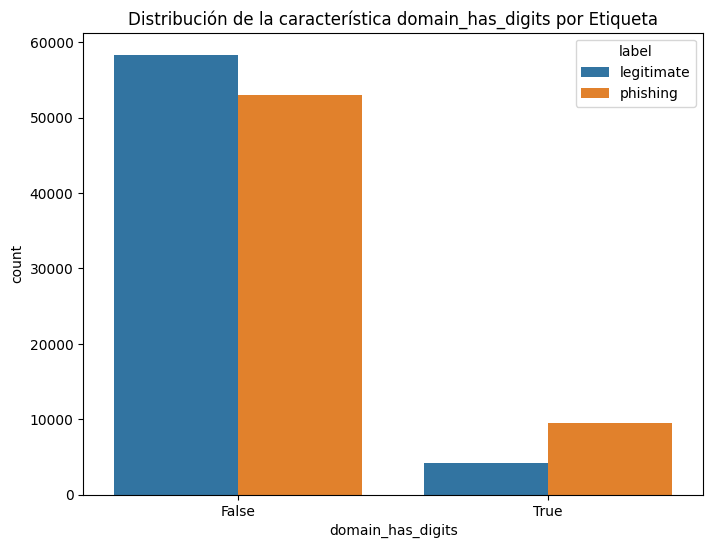

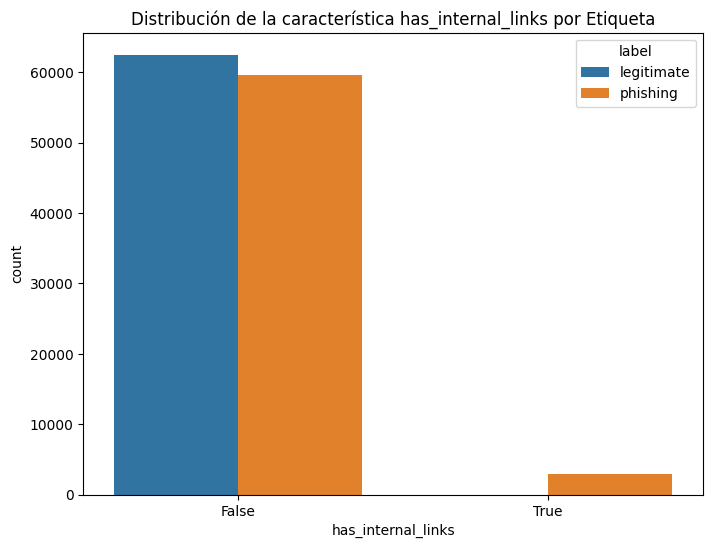

In [14]:
boolean_features = ['starts_with_ip', 'has_punycode', 'domain_has_digits', 'has_internal_links']
for feature in boolean_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue='label', data=df)
    plt.title(f'Distribución de la característica {feature} por Etiqueta')
    plt.show()

No se divisan diferencias importantes.

**Entropía de URL y Caracteres**: La entropía en el contexto de URLs es una medida de la aleatoriedad o complejidad de la URL. Se basa en el concepto de entropía de la teoría de la información, que mide la incertidumbre o la cantidad de información contenida en un conjunto de datos. En el caso de URLs, se refiere a qué tan predecible o impredecible es la URL. Vamos a analizar la entropía (url_entropy, nan_char_entropy) para verificar si las URLs de phishing tienen una mayor variabilidad en su composición en comparación con las URLs legítimas.

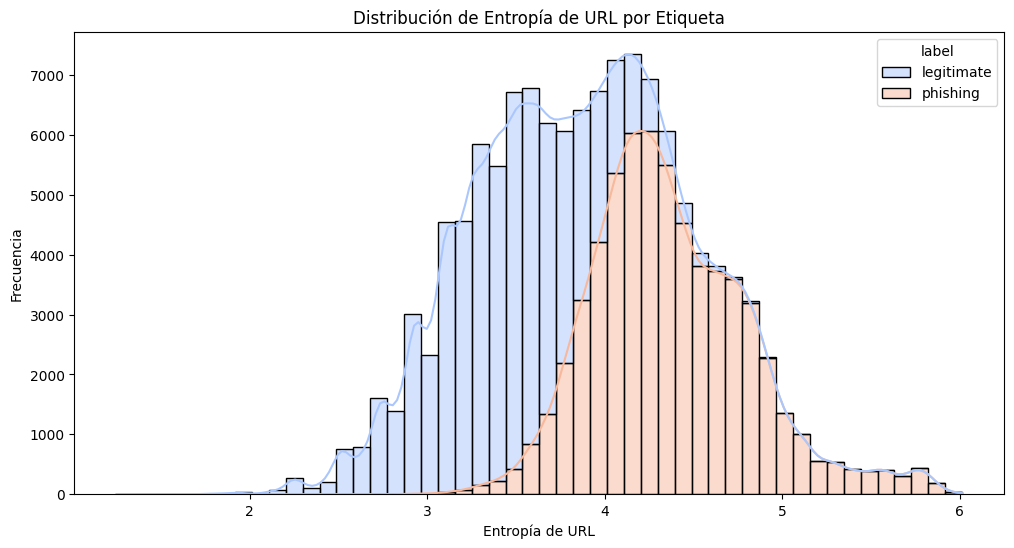

In [23]:
# Análisis de entropía con hue para diferenciar entre phishing y legítimas
plt.figure(figsize=(12, 6))

# Histograma para la entropía de URL
sns.histplot(data=df, x='url_entropy', hue='label', multiple='stack', kde=True, bins=50, palette='coolwarm')
plt.title('Distribución de Entropía de URL por Etiqueta')
plt.xlabel('Entropía de URL')
plt.ylabel('Frecuencia')
plt.show()

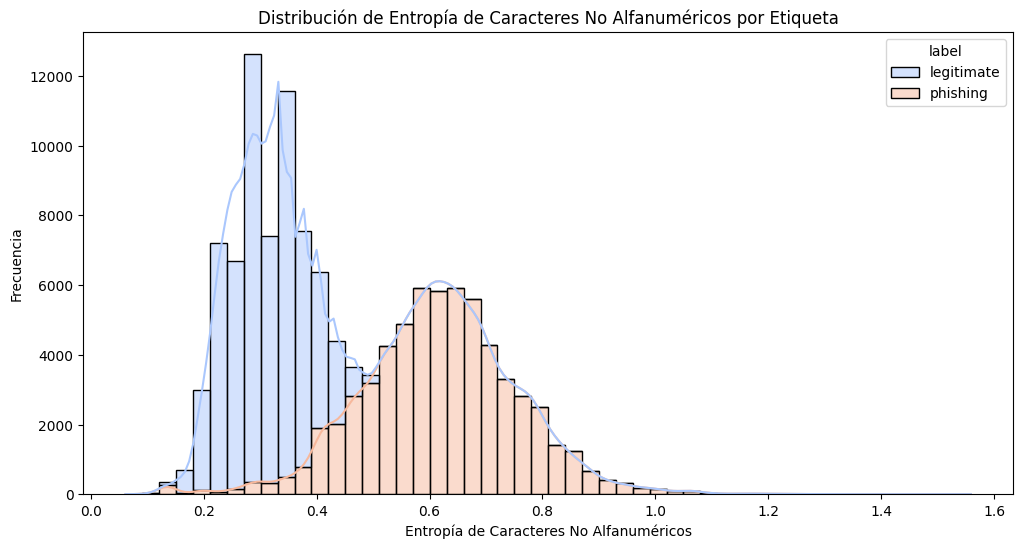

In [24]:
# Histograma para la entropía de caracteres no alfanuméricos
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='nan_char_entropy', hue='label', multiple='stack', kde=True, bins=50, palette='coolwarm')
plt.title('Distribución de Entropía de Caracteres No Alfanuméricos por Etiqueta')
plt.xlabel('Entropía de Caracteres No Alfanuméricos')
plt.ylabel('Frecuencia')
plt.show()

#### Observaciones clave:

**Eje X**: Representa la "Entropía de Caracteres No Alfanuméricos", que va desde 0.0 hasta 1.6.

**Eje Y**: Muestra la frecuencia, llegando hasta aproximadamente 12000.

#### Distribución de mensajes legítimos (azul):

Tiene un pico pronunciado alrededor de 0.4 en el eje de entropía.
La mayoría de los datos se concentran entre 0.2 y 0.6.


#### Distribución de mensajes de phishing (rosa/rojo):

Tiene un pico más bajo y amplio, centrado alrededor de 0.7 en el eje de entropía.
Los datos están más dispersos, extendiéndose aproximadamente desde 0.4 hasta 1.0.

**Superposición**: Hay una zona de superposición entre ambas distribuciones, principalmente entre 0.4 y 0.6.


#### Esto sugiere que los mensajes legítimos tienden a tener una entropía de caracteres no alfanuméricos más baja y concentrada, mientras que los mensajes de phishing tienden a tener una entropía más alta y variada. Esta diferencia podría ser utilizada como un indicador para distinguir entre mensajes legítimos y de phishing en sistemas de detección de fraudes o filtros de correo no deseado.


**Conteos de Caracteres Especiales**: Examinamos la cantidad de puntos (dot_count), arrobas (at_count), y guiones (dash_count) en las URLs para identificar patrones comunes en URLs de phishing.

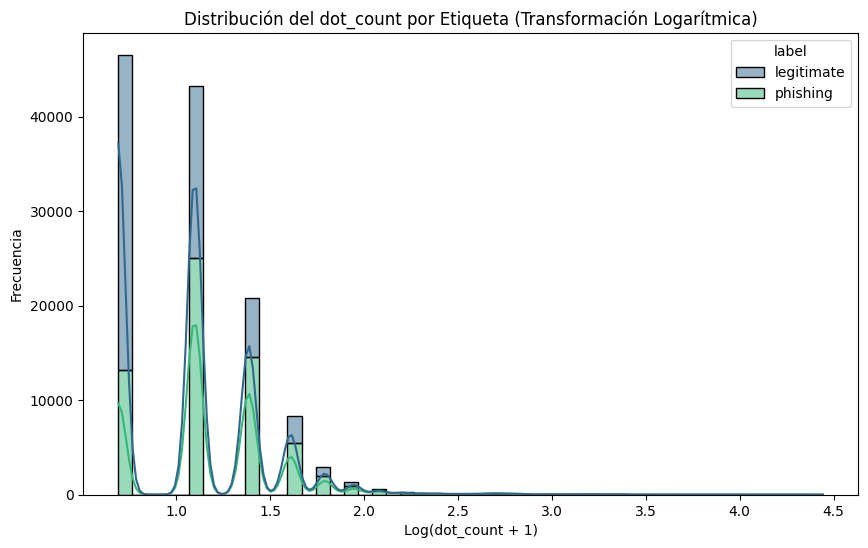

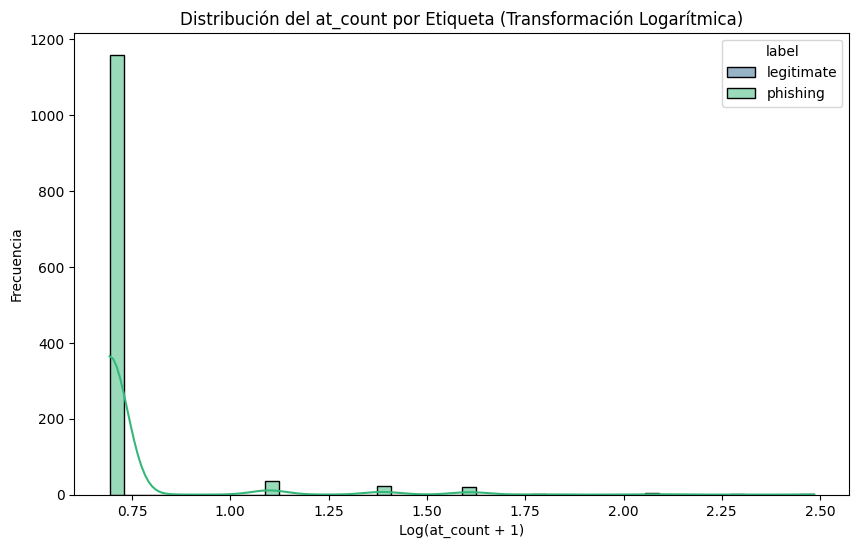

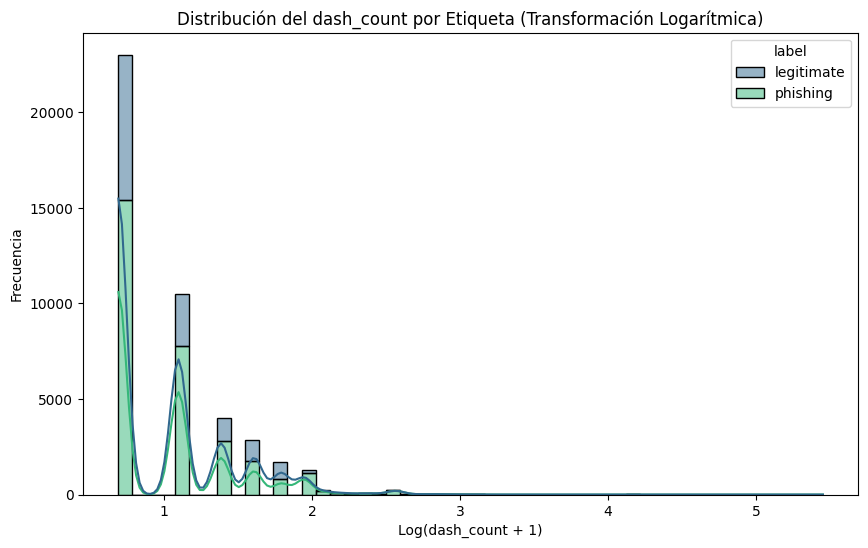

In [28]:
# Aplicar transformación logarítmica para mejorar la visualización y añadir la etiqueta
special_features = ['dot_count', 'at_count', 'dash_count']
for feature in special_features:
    plt.figure(figsize=(10, 6))
    # Aplicar transformación logarítmica para mejorar la visualización
    df[f'{feature}_log'] = np.log1p(df[feature].replace(0, np.nan))  # Evitar log(0)
    
    # Graficar usando hue para distinguir entre phishing y legítimas
    sns.histplot(df, x=f'{feature}_log', hue='label', multiple='stack', kde=True, bins=50, palette='viridis')
    plt.title(f'Distribución del {feature} por Etiqueta (Transformación Logarítmica)')
    plt.xlabel(f'Log({feature} + 1)')
    plt.ylabel('Frecuencia')
    plt.show()

Esta diferencia marcada en las primeras dos columnas del primer grafico sugiere que los mensajes con muy pocos puntos son más propensos a ser legítimos.

**Subdominios y Dominio**: Analizamos la cantidad de subdominios (subdomain_count) y la presencia de dígitos en el dominio (domain_has_digits) para observar si estas características son indicativas de phishing.

c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


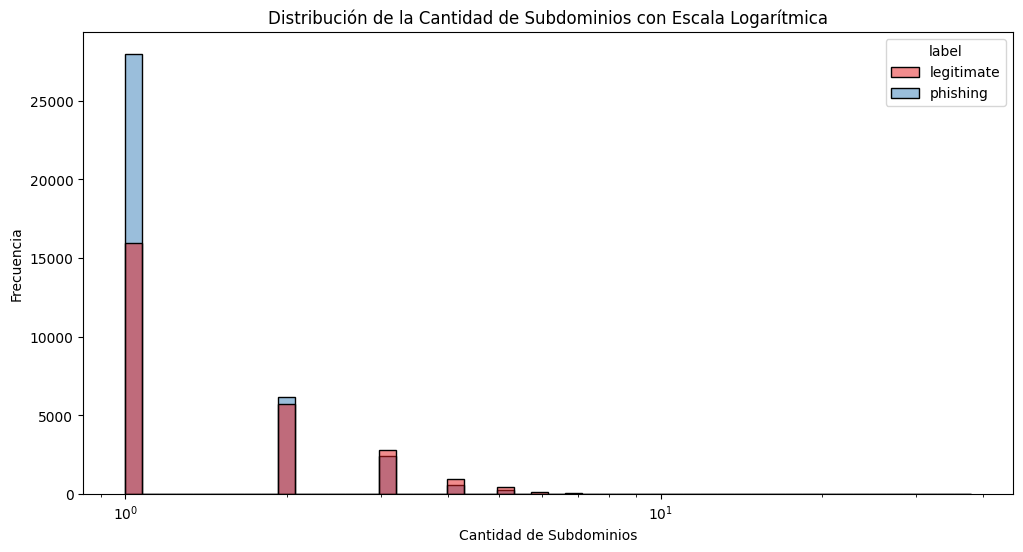

In [39]:
# Análisis de subdominios y dominio con transformación logarítmica
plt.figure(figsize=(12, 6))
sns.histplot(df, x='subdomain_count', hue='label', kde=True, bins=50, palette='Set1', log_scale=True)
plt.title('Distribución de la Cantidad de Subdominios con Escala Logarítmica')
plt.xlabel('Cantidad de Subdominios')
plt.ylabel('Frecuencia')
plt.show()

Un alto número de subdominios podría ser un indicador de phishing, aunque no es concluyente por sí solo. La gran mayoría de los URLs, independientemente de su legitimidad, tienden a usar estructuras de dominio simples con pocos subdominios.

### 3. Análisis de Correlaciones:

**Correlación entre Características**: Evaluamos las correlaciones entre las diferentes características, como la longitud de la URL y la presencia de caracteres especiales, para identificar patrones que puedan indicar phishing.

Para calcular la matriz de correlación debemos asegurarnos que solo se utilicen las columnas numéricas.

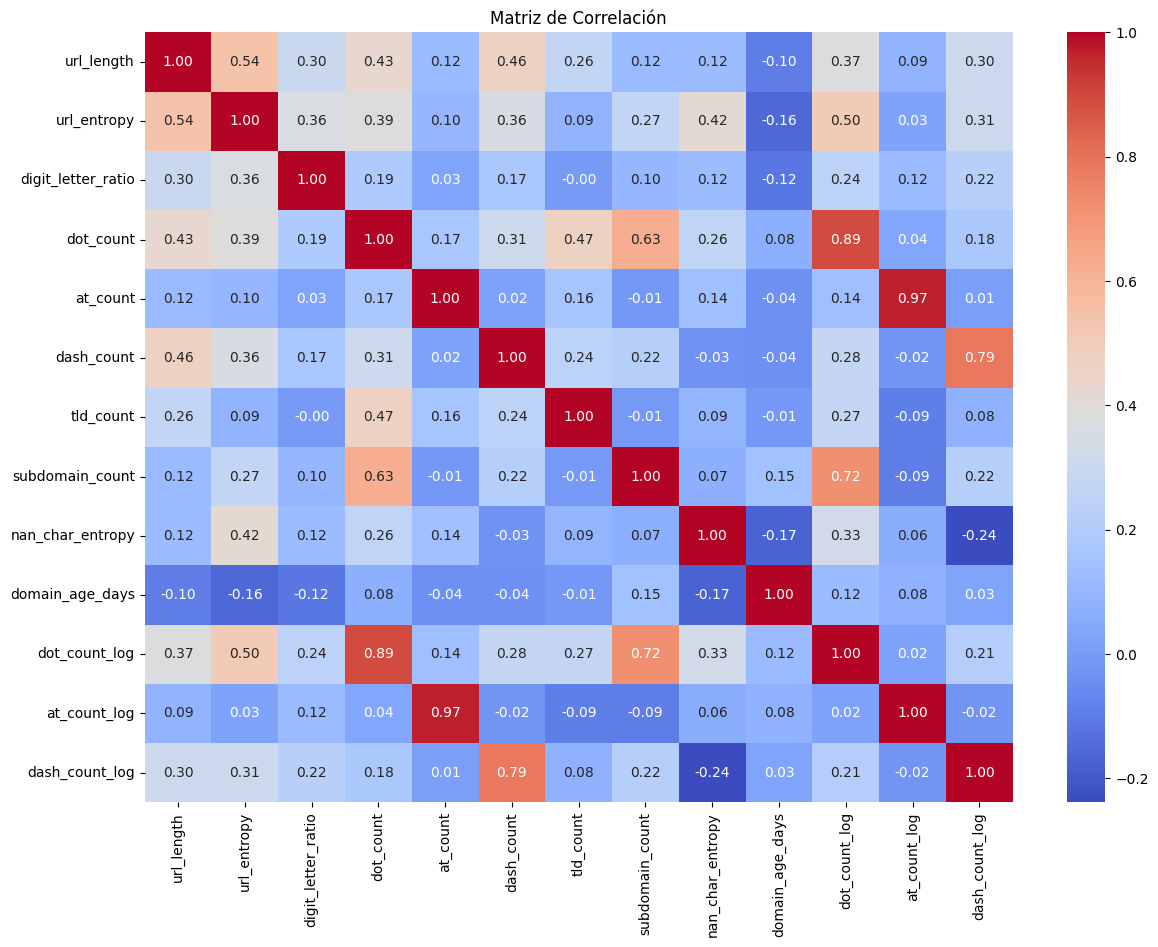

In [42]:
# Filtrar solo las columnas numéricas para calcular la correlación
numeric_features = df.select_dtypes(include=[np.number])
corr_matrix = numeric_features.corr()

# Crear la matriz de correlación
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

#### Correlaciones fuertes (>0.7):

at_count y at_count_log (0.97): Esto es esperado ya que una es la versión logarítmica de la otra.
dot_count y dot_count_log (0.89): Ídem.
dash_count y dash_count_log (0.79): Ídem.

subdomain_count y dot_count_log (0.72): Sugiere una relación entre el número de subdominios y la cantidad de puntos en la URL.


#### Correlaciones moderadas (0.4-0.7):

url_length y url_entropy (0.54): URLs más largas tienden a tener mayor entropía.
url_length y dash_count (0.46): URLs más largas tienden a tener más guiones.
url_entropy y dot_count_log (0.50): Mayor entropía se asocia con más puntos en la URL.


#### Correlaciones débiles o nulas:

Muchas características muestran correlaciones débiles entre sí, lo que es bueno para evitar multicolinealidad.


#### Correlaciones negativas:

Pocas correlaciones negativas significativas, la mayoría son cercanas a cero.
domain_age_days tiene correlaciones negativas débiles con varias características, lo que podría ser interesante de investigar.


#### Observaciones específicas:

digit_letter_ratio tiene correlaciones generalmente bajas con otras características, lo que sugiere que podría aportar información única.

nan_char_entropy muestra correlaciones bajas a moderadas con otras características, indicando que también podría ser una característica distintiva.


#### Esta matriz de correlación sugiere que las características seleccionadas capturan diversos aspectos de las URLs, lo que es prometedor para la tarea de detección de phishing. Sin embargo, se podría considerar eliminar algunas características altamente correlacionadas para simplificar el modelo sin perder mucha información. Las fuertes correlaciones entre las versiones originales y logarítmicas de ciertas características (como dot_count y dot_count_log) sugieren que se podría elegir una u otra para evitar redundancia.



**Correlación con la Etiqueta**: Investigaremos cómo cada característica se correlaciona con la etiqueta de phishing o legítima para entender qué atributos tienen mayor peso en la clasificación.

La correlación que se obtiene de esta manera se refiere a la relación entre cada característica numérica y la etiqueta de phishing, que será convertida a valores numéricos (0 y 1, por ejemplo). En este caso, el valor 0 puede representar "legítimo" y el valor 1 puede representar "phishing". La correlación dirá cómo varía cada característica numérica en relación con la probabilidad de que una URL sea phishing.

*Correlación Positiva*: Si una característica tiene una alta correlación positiva con la etiqueta, significa que a medida que el valor de esa característica aumenta, es más probable que la URL sea clasificada como phishing.

*Correlación Negativa*: Si una característica tiene una alta correlación negativa, significa que a medida que el valor de esa característica aumenta, es más probable que la URL sea clasificada como legítima.

##### I. Convertimos Etiqueta a Valores Numéricos:

In [58]:
# Asegurarse de que la etiqueta es categórica
df['label'] = df['label'].astype('category')

# Convertir la etiqueta en números para análisis de correlación
df['label_num'] = df['label'].cat.codes

# Mapa de codificación de la etiqueta
label_map = dict(enumerate(df['label'].cat.categories))

Aquí, df['label_num'] es una columna con valores numéricos que representan las etiquetas (0 para legítima, 1 para phishing, si asumimos esa codificación).

##### II. Calculamos Correlación:

In [59]:
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_features.remove('label_num')  # Eliminar la columna de etiquetas numéricas

correlation_with_label = df[numeric_features + ['label_num']].corr()
correlation_with_label = correlation_with_label['label_num'].drop('label_num')

Este cálculo da la correlación entre cada característica numérica y la etiqueta numérica (label_num).

##### III. Visualizamos Correlaciones:

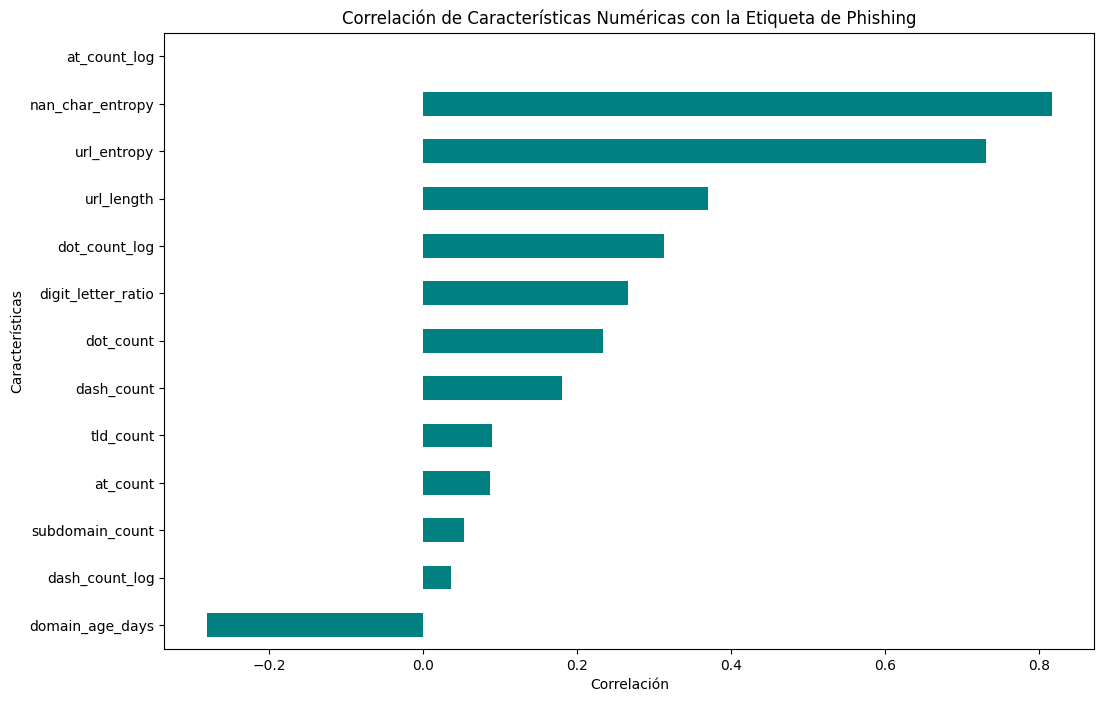

In [62]:
# Visualización de correlaciones con la etiqueta
plt.figure(figsize=(12, 8))
correlation_with_label.sort_values().plot(kind='barh', color='teal')
plt.title('Correlación de Características Numéricas con la Etiqueta de Phishing')
plt.xlabel('Correlación')
plt.ylabel('Características')
plt.show()


#### Interpretación
*Valores Positivos*: Indican características que tienden a ser mayores en URLs de phishing en comparación con URLs legítimas.

*Valores Negativos*: Indican características que tienden a ser menores en URLs de phishing en comparación con URLs legítimas.